Author:LINCC Frameworks team

Last updated: July 08, 2025

# Possible AGN problem 1 - how many SDSS AGN are there?

## Get SDSS AGN

You can use `wget` to get the data, following the pattern shown here:

https://github.com/lsst-sitcom/linccf/blob/main/internal/agn_variability/2025_jan/00-download_sdss_dr7qso.sh

...then transform it into something that LSDB can ingest.

In [1]:
# !wget https://das.sdss.org/va/qso_properties_dr7/data/catalogs/dr7_bh_June_2010.fits.gz

--2025-07-08 14:32:57--  https://das.sdss.org/va/qso_properties_dr7/data/catalogs/dr7_bh_June_2010.fits.gz
Resolving das.sdss.org (das.sdss.org)... 128.220.233.141
Connecting to das.sdss.org (das.sdss.org)|128.220.233.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43841146 (42M) [application/x-gzip]
Saving to: ‘dr7_bh_June_2010.fits.gz.1’

dr7_bh_June_2010.fi 100%[===================>]  41.81M  9.46MB/s    in 8.3s    

2025-07-08 14:33:07 (5.05 MB/s) - ‘dr7_bh_June_2010.fits.gz.1’ saved [43841146/43841146]



In [2]:
import astropy
from astropy.table import Table
import pandas as pd
import lsdb

data = Table.read('dr7_bh_June_2010.fits.gz')
pdata = data.to_pandas()
pdata

,SDSS_NAME,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,...,LOGBH_MGII_VO09,LOGBH_MGII_VO09_ERR,LOGBH_MGII_S10,LOGBH_MGII_S10_ERR,LOGBH_CIV_VP06,LOGBH_CIV_VP06_ERR,LOGBH,LOGBH_ERR,LOGEDD_RATIO,SPECIAL_INTEREST_FLAG
0,b'000006.53+003055.2',0.027228,0.515341,1.8246,685,467,52203,34603008,1,0,...,8.716234,0.529814,9.284316,0.193147,9.269005,0.135824,9.284316,0.193147,-1.348913,0
1,b'000008.13+001634.6',0.033900,0.276301,1.8373,685,470,52203,1048576,1,0,...,9.089737,0.200092,9.169480,0.172326,8.500652,0.067393,9.169480,0.172326,-0.893524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105781,b'235959.06-090944.0',359.996094,-9.162233,1.2834,650,448,52143,4,1,0,...,8.914797,0.034073,9.024543,0.035157,0.000000,-1.000000,9.024543,0.035157,-0.498561,0
105782,b'235959.44+000841.5',359.997681,0.144870,1.3542,1489,520,52991,33554432,1,0,...,8.717807,0.059179,8.725126,0.055435,0.000000,-1.000000,8.725126,0.055435,-1.052396,0


In [3]:
dr7_cat = lsdb.from_dataframe(pdata, ra_column="RA", dec_column="DEC")
dr7_cat

,SDSS_NAME,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,MI_Z2,LOGLBOL,LOGLBOL_ERR,BAL_FLAG,FIRST_FR_TYPE,FINT_REST6CM_MJY_OBS,LOGFNU2500A_ERGS_OBS,R_6CM_2500A,LOGL5100,LOGL5100_ERR,LOGL3000,LOGL3000_ERR,LOGL1350,LOGL1350_ERR,LOGL_BROAD_HA,LOGL_BROAD_HA_ERR,FWHM_BROAD_HA,FWHM_BROAD_HA_ERR,EW_BROAD_HA,EW_BROAD_HA_ERR,LOGL_NARROW_HA,LOGL_NARROW_HA_ERR,FWHM_NARROW_HA,FWHM_NARROW_HA_ERR,EW_NARROW_HA,EW_NARROW_HA_ERR,LOGL_NII_6585,LOGL_NII_6585_ERR,EW_NII_6585,EW_NII_6585_ERR,LOGL_SII_6718,LOGL_SII_6718_ERR,EW_SII_6718,EW_SII_6718_ERR,LOGL_SII_6732,LOGL_SII_6732_ERR,EW_SII_6732,EW_SII_6732_ERR,EW_FE_HA,EW_FE_HA_ERR,ALPHA_HA,ALPHA_HA_ERR,LINE_NPIX_HA,LINE_MED_SN_HA,LINE_REDCHI2_HA,LOGL_BROAD_HB,LOGL_BROAD_HB_ERR,FWHM_BROAD_HB,FWHM_BROAD_HB_ERR,EW_BROAD_HB,EW_BROAD_HB_ERR,LOGL_NARROW_HB,LOGL_NARROW_HB_ERR,FWHM_NARROW_HB,FWHM_NARROW_HB_ERR,EW_NARROW_HB,EW_NARROW_HB_ERR,FWHM_BROAD_HB_1GAUSS,LOGL_OIII_4959,LOGL_OIII_4959_ERR,EW_OIII_4959,EW_OIII_4959_ERR,LOGL_OIII_5007,LOGL_OIII_5007_ERR,EW_OIII_5007,EW_OIII_5007_ERR,EW_FE_HB_4434_4684,EW_FE_HB_4434_4684_ERR,ALPHA_HB,ALPHA_HB_ERR,LINE_NPIX_HB,LINE_MED_SN_HB,LINE_REDCHI2_HB,LOGL_MGII,LOGL_MGII_ERR,FWHM_MGII,FWHM_MGII_ERR,EW_MGII,EW_MGII_ERR,LOGL_BROAD_MGII,LOGL_BROAD_MGII_ERR,FWHM_BROAD_MGII,FWHM_BROAD_MGII_ERR,EW_BROAD_MGII,EW_BROAD_MGII_ERR,FWHM_BROAD_MGII_1GAUSS,EW_FE_MGII,EW_FE_MGII_ERR,ALPHA_MGII,ALPHA_MGII_ERR,LINE_NPIX_MGII,LINE_MED_SN_MGII,LINE_REDCHI2_MGII,LOGL_CIV,LOGL_CIV_ERR,FWHM_CIV,FWHM_CIV_ERR,EW_CIV,EW_CIV_ERR,ALPHA_CIV,ALPHA_CIV_ERR,LINE_NPIX_CIV,LINE_MED_SN_CIV,LINE_REDCHI2_CIV,VOFF_BROAD_HA,VOFF_BROAD_HA_ERR,VOFF_NARROW_HA,VOFF_NARROW_HA_ERR,VOFF_BROAD_HB,VOFF_BROAD_HB_ERR,VOFF_NARROW_HB,VOFF_NARROW_HB_ERR,VOFF_BROAD_MGII,VOFF_BROAD_MGII_ERR,VOFF_CIV_PEAK,VOFF_CIV_PEAK_ERR,LOGBH_HB_MD04,LOGBH_HB_MD04_ERR,LOGBH_HB_VP06,LOGBH_HB_VP06_ERR,LOGBH_MGII_MD04,LOGBH_MGII_MD04_ERR,LOGBH_MGII_VO09,LOGBH_MGII_VO09_ERR,LOGBH_MGII_S10,LOGBH_MGII_S10_ERR,LOGBH_CIV_VP06,LOGBH_CIV_VP06_ERR,LOGBH,LOGBH_ERR,LOGEDD_RATIO,SPECIAL_INTEREST_FLAG
npartitions=12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 0, Pixel: 0",binary[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarro

Now crossmatch this new catalog with the photo-z one we used in Notebook 3.

In [4]:
photoz = lsdb.open_catalog("/epyc/data3/hats/catalogs/dp1/object_photoz")

In [5]:
dr7_x_pz = dr7_cat.crossmatch(photoz)
dr7_x_pz

/astro/users/dtj1s/.conda/envs/dtj1s-py3.12/lib/python3.12/site-packages/lsdb/dask/crossmatch_catalog_data.py:147: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


RuntimeError: Catalogs do not overlap

No, the catalogs have nothing in common since they don't overlap.

In [6]:
# are any of them in photo-z catalog?
# if yes, do photometric redshifts agree with each other? Do they agree with SDSS estimate?
# if no, is that resonable? Plot distributions of AGNs and Rubin DP1 coverage and compare

(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Points in the object_photoz catalog'}>)

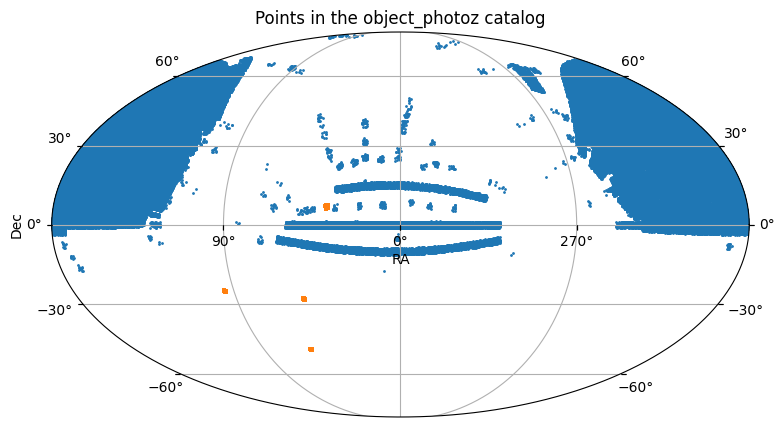

In [7]:
dr7_cat.plot_points(s=1)
photoz.plot_points(s=1)

No, the catalog objects do not overlap.

# Possible AGN problem 2 - crossmatch large number of AGN

In [8]:
# Get MiliQuas catalog from https://quasars.org/milliquas.htm
# transform into something that lsdb can ingest, like pandas df
# load into lsdb with lsdb.from_dataframe function
# crossmatch with DP1 object collections 
# get all AGN that you can find
# crossmatch with DP1 dia_object collections 
# get all AGN that you can find
# What is the difference in the number of objects and dia_objects you have found?

In [ ]:
# !wget https://quasars.org/milliquas.fits.zip

In [9]:
# astropy.Table.read can handle .gz compression but not .zip
# !unzip milliquas.fits.zip

In [10]:
mdata = Table.read("milliquas.fits")
pmdata = mdata.to_pandas()
pmdata

,RA,DEC,NAME,TYPE,RMAG,BMAG,COMMENT,R,B,Z,CITE,ZCITE,XNAME,RNAME,LOBE1,LOBE2
0,0.000629,35.517844,b'SDSS J000000.15+353104.2 ',b'Q ',17.93,19.000000,b'pG ',b'-',b'-',0.845,b'DR16Q ',b'DR16 ',b' ',b' ',b' ',b' '
1,0.000657,-20.074344,b'UVQSJ000000.15-200427.7 ',b'AX ',17.90,18.459999,b'pG ',b'-',b'1',0.291,b'UVQS ',b'UVQS ',b'LSXPS J000000.1-200426',b' ',b' ',b' '
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021798,359.999746,20.721087,b'SDSS J235959.94+204315.8 ',b'Q ',20.27,20.350000,b'gG ',b'-',b'-',2.010,b'DR16Q ',b'DR16 ',b' ',b' ',b' ',b' '
1021799,359.999954,34.747133,b'SDSS J235959.98+344449.6 ',b'Q ',20.57,20.879999,b'g ',b'-',b'-',2.375,b'DR16Q ',b'DR16Q ',b' ',b' ',b' ',b' '


In [11]:
m_cat = lsdb.from_dataframe(pmdata, ra_column="RA", dec_column="DEC")
m_cat

/astro/users/dtj1s/.conda/envs/dtj1s-py3.12/lib/python3.12/site-packages/lsdb/loaders/dataframe/dataframe_catalog_loader.py:108: RuntimeWarning: from_dataframe is not intended for large datasets. Consider using hats-import: https://hats-import.readthedocs.io/
  warnings.warn(


,RA,DEC,NAME,TYPE,RMAG,BMAG,COMMENT,R,B,Z,CITE,ZCITE,XNAME,RNAME,LOBE1,LOBE2
npartitions=12,,,,,,,,,,,,,,,,
"Order: 0, Pixel: 0",double[pyarrow],double[pyarrow],binary[pyarrow],binary[pyarrow],float[pyarrow],float[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow],float[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow]
"Order: 0, Pixel: 1",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 0, Pixel: 10",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 0, Pixel: 11",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [12]:
dp1_obj = lsdb.open_catalog("/epyc/data3/hats/catalogs/dp1/object_collection")
dp1_obj

,coord_dec,coord_decErr,coord_ra,coord_raErr,g_psfFlux,g_psfFluxErr,g_psfMag,g_psfMagErr,i_psfFlux,i_psfFluxErr,i_psfMag,i_psfMagErr,objectId,patch,r_psfFlux,r_psfFluxErr,r_psfMag,r_psfMagErr,refBand,refFwhm,shape_flag,shape_xx,shape_xy,shape_yy,tract,u_psfFlux,u_psfFluxErr,u_psfMag,u_psfMagErr,x,xErr,y,y_psfFlux,y_psfFluxErr,y_psfMag,y_psfMagErr,yErr,z_psfFlux,z_psfFluxErr,z_psfMag,z_psfMagErr,objectForcedSource
npartitions=389,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 6, Pixel: 130",double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],float[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],"nested<coord_ra: [double], coord_dec: [double]..."
"Order: 8, Pixel: 2176",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2302101",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 7, Pixel: 143884",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
m_x_dp1_obj = m_cat.crossmatch(dp1_obj, radius_arcsec=0.1)
from dask.distributed import Client
client = Client(n_workers=16, memory_limit="16GB")

/astro/users/dtj1s/.conda/envs/dtj1s-py3.12/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37753 instead
  warnings.warn(


In [14]:
%%time
m_x_dp1_obj_c = m_x_dp1_obj.compute()
m_x_dp1_obj_c

/astro/users/dtj1s/.conda/envs/dtj1s-py3.12/lib/python3.12/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 59.60 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CPU times: user 2.4 s, sys: 128 ms, total: 2.53 s
Wall time: 6.87 s


RA_from_lsdb_dataframe  DEC_from_lsdb_dataframe  \
_healpix_29                                                            
9583286184997455                  37.784846                 6.401708   
9589207111743847                  38.493228                  6.42792   
...                                     ...                      ...   
2530266678998616679               53.066504               -27.577352   
2531113080423514090               40.491485               -34.346719   

                         NAME_from_lsdb_dataframe TYPE_from_lsdb_dataframe  \
_healpix_29                                                                  
9583286184997455     b'LAMOSTJ023108.36+062406.2'                  b'Q   '   
9589207111743847     b'LAMOSTJ023358.37+062540.4'                  b'QR  '   
...                                           ...                      ...   
2530266678998616679  b'WCDFS J033215.96-273438.4'                  b'A   '   
2531113080423514090  b'Q J0241-3420             '                  b'Q   '   

                     RMAG_from_lsdb_dataframe  BMAG_from_lsdb_dataframe  \
_healpix_29                                                               
9583286184997455                    19.389999                     19.73   
9589207111743847                        18.83                     20.26   
...                                       ...                       ...   
2530266678998616679                 22.940001                 24.559999   
2531113080423514090                 18.290001                 18.959999   

                    COMMENT_from_lsdb_dataframe R_from_lsdb_dataframe  \
_healpix_29                                                             
9583286184997455                         b'pG '                  b'-'   
9589207111743847                         b'jG '                  b'1'   
...                                         ...                   ...   
2530266678998616679                      b'd  '                  b'n'   
2531113080423514090                      b'jG '                  b'-'   

                    B_from_lsdb_dataframe  Z_from_lsdb_dataframe  ...  \
_healpix_29                                                       ...   
9583286184997455                     b'-'                  1.404  ...   
9589207111743847                     b'-'                  3.932  ...   
...                                   ...                    ...  ...   
2530266678998616679                  b'n'                  0.742  ...   
2531113080423514090                  b'-'                   1.43  ...   

                    y_psfFluxErr_object_lc y_psfMag_object_lc  \
_healpix_29                                                     
9583286184997455                      <NA>               <NA>   
9589207111743847                      <NA>               <NA>   
...                                    ...                ...   
2530266678998616679             936.135132          21.656466   
2531113080423514090                   <NA>               <NA>   

                    y_psfMagErr_object_lc yErr_object_lc z_psfFlux_object_lc  \
_healpix_29                                                                    
9583286184997455                     <NA>       0.006627        56795.382812   
9589207111743847                     <NA>       0.008974        82239.742188   
...                                   ...            ...                 ...   
2530266678998616679              0.129329        0.06311         5985.897949   
2531113080423514090                  <NA>       0.003418                <NA>   

                    z_psfFluxErr_object_lc  z_psfMag_object_lc  \
_healpix_29                                                      
9583286184997455                319.930939           19.514217   
9589207111743847                318.370789           19.112295   
...                                    ...                 ...   
2530266678998616679             110.244308           21.957176   
253111

In [15]:
dp1_dia_obj = lsdb.open_catalog("/epyc/data3/hats/catalogs/dp1/dia_object_collection")
m_x_dp1_dia_obj = m_cat.crossmatch(dp1_dia_obj, radius_arcsec=0.1)

In [16]:
%%time
m_x_dp1_dia_obj_c = m_x_dp1_obj.compute()
m_x_dp1_dia_obj_c

/astro/users/dtj1s/.conda/envs/dtj1s-py3.12/lib/python3.12/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 59.60 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CPU times: user 2.44 s, sys: 116 ms, total: 2.55 s
Wall time: 5.58 s


RA_from_lsdb_dataframe  DEC_from_lsdb_dataframe  \
_healpix_29                                                            
9583286184997455                  37.784846                 6.401708   
9589207111743847                  38.493228                  6.42792   
...                                     ...                      ...   
2530266678998616679               53.066504               -27.577352   
2531113080423514090               40.491485               -34.346719   

                         NAME_from_lsdb_dataframe TYPE_from_lsdb_dataframe  \
_healpix_29                                                                  
9583286184997455     b'LAMOSTJ023108.36+062406.2'                  b'Q   '   
9589207111743847     b'LAMOSTJ023358.37+062540.4'                  b'QR  '   
...                                           ...                      ...   
2530266678998616679  b'WCDFS J033215.96-273438.4'                  b'A   '   
2531113080423514090  b'Q J0241-3420             '                  b'Q   '   

                     RMAG_from_lsdb_dataframe  BMAG_from_lsdb_dataframe  \
_healpix_29                                                               
9583286184997455                    19.389999                     19.73   
9589207111743847                        18.83                     20.26   
...                                       ...                       ...   
2530266678998616679                 22.940001                 24.559999   
2531113080423514090                 18.290001                 18.959999   

                    COMMENT_from_lsdb_dataframe R_from_lsdb_dataframe  \
_healpix_29                                                             
9583286184997455                         b'pG '                  b'-'   
9589207111743847                         b'jG '                  b'1'   
...                                         ...                   ...   
2530266678998616679                      b'd  '                  b'n'   
2531113080423514090                      b'jG '                  b'-'   

                    B_from_lsdb_dataframe  Z_from_lsdb_dataframe  ...  \
_healpix_29                                                       ...   
9583286184997455                     b'-'                  1.404  ...   
9589207111743847                     b'-'                  3.932  ...   
...                                   ...                    ...  ...   
2530266678998616679                  b'n'                  0.742  ...   
2531113080423514090                  b'-'                   1.43  ...   

                    y_psfFluxErr_object_lc y_psfMag_object_lc  \
_healpix_29                                                     
9583286184997455                      <NA>               <NA>   
9589207111743847                      <NA>               <NA>   
...                                    ...                ...   
2530266678998616679             936.135132          21.656466   
2531113080423514090                   <NA>               <NA>   

                    y_psfMagErr_object_lc yErr_object_lc z_psfFlux_object_lc  \
_healpix_29                                                                    
9583286184997455                     <NA>       0.006627        56795.382812   
9589207111743847                     <NA>       0.008974        82239.742188   
...                                   ...            ...                 ...   
2530266678998616679              0.129329        0.06311         5985.897949   
2531113080423514090                  <NA>       0.003418                <NA>   

                    z_psfFluxErr_object_lc  z_psfMag_object_lc  \
_healpix_29                                                      
9583286184997455                319.930939           19.514217   
9589207111743847                318.370789           19.112295   
...                                    ...                 ...   
2530266678998616679             110.244308           21.957176   
253111

# Possible AGN problem 3 - run a function accross AGN lightcurves

In [17]:
# Ok, now you have some lightcurves. Lets run a function over these lightcurves

# a) you can run a very rough Structure Function from https://github.com/lsst-sitcom/linccf/blob/main/demo_notebooks/ComCam_Milliquas.ipynb
# see the bottom of the notebook; please verify the quality of the implementation before any other futher effort

# b) get EzTao from  https://github.com/ywx649999311/EzTao
# fit drw fit (drw_fit(t, y, yerr)) to the longest lightcurves that you can find (e.g., more than 200 observations in red band)


In [28]:
m_x_dp1_obj_c['objectForcedSource_object_lc']

_healpix_29
9583286184997455       [{coord_ra: 37.784845, coord_dec: 6.401704, vi...
9589207111743847       [{coord_ra: 38.493227, coord_dec: 6.42791, vis...
                                             ...                        
2530266678998616679    [{coord_ra: 53.066508, coord_dec: -27.577355, ...
2531113080423514090    [{coord_ra: 40.491486, coord_dec: -34.346718, ...
Name: objectForcedSource_object_lc, Length: 646, dtype: nested<coord_ra: [double], coord_dec: [double], visit: [int64], detector: [int16], band: [string], psfFlux: [float], psfFluxErr: [float], psfFlux_flag: [bool], psfDiffFlux: [float], psfDiffFluxErr: [float], psfDiffFlux_flag: [bool], pixelFlags_bad: [bool], pixelFlags_cr: [bool], pixelFlags_crCenter: [bool], pixelFlags_edge: [bool], pixelFlags_interpolated: [bool], pixelFlags_interpolatedCenter: [bool], pixelFlags_nodata: [bool], pixelFlags_saturated: [bool], pixelFlags_saturatedCenter: [bool], pixelFlags_suspect: [bool], pixelFlags_suspectCenter: [bool], invali

In [33]:
from nested_pandas.utils import count_nested

m_x_dp1_obj_ct = count_nested(m_x_dp1_obj_c, "objectForcedSource_object_lc")
long_light = m_x_dp1_obj_ct.query("n_objectForcedSource_object_lc > 200")
long_light

RA_from_lsdb_dataframe  DEC_from_lsdb_dataframe  \
_healpix_29                                                            
1450134596509057692               95.133821               -25.254856   
2415759207242145357                58.88646               -48.859599   
...                                     ...                      ...   
2530253631113069183               52.966718               -27.722697   
2530253698219385731               52.990831               -27.702488   

                         NAME_from_lsdb_dataframe TYPE_from_lsdb_dataframe  \
_healpix_29                                                                  
1450134596509057692  b'PKS 0618-252             '                  b'QR2 '   
2415759207242145357  b'3HSPJ035532.7-485134     '                  b'B2  '   
...                                           ...                      ...   
2530253631113069183  b'WCDFS J033152.03-274321.7'                  b'Q   '   
2530253698219385731  b'WCDFS J033157.79-274208.8'                  b'AX  '   

                     RMAG_from_lsdb_dataframe  BMAG_from_lsdb_dataframe  \
_healpix_29                                                               
1450134596509057692                     18.58                 17.860001   
2415759207242145357                      18.6                     20.82   
...                                       ...                       ...   
2530253631113069183                 22.950001                     23.43   
2530253698219385731                     22.25                 23.530001   

                    COMMENT_from_lsdb_dataframe R_from_lsdb_dataframe  \
_healpix_29                                                             
1450134596509057692                      b'pG '                  b'1'   
2415759207242145357                      b'jG '                  b'1'   
...                                         ...                   ...   
2530253631113069183                      b'd  '                  b'n'   
2530253698219385731                      b'd  '                  b'-'   

                    B_from_lsdb_dataframe  Z_from_lsdb_dataframe  ...  \
_healpix_29                                                       ...   
1450134596509057692                  b'-'                    1.9  ...   
2415759207242145357                  b'1'                    0.5  ...   
...                                   ...                    ...  ...   
2530253631113069183                  b'n'                    1.5  ...   
2530253698219385731                  b'-'                  0.668  ...   

                    y_psfMag_object_lc y_psfMagErr_object_lc yErr_object_lc  \
_healpix_29                                                                   
1450134596509057692          17.994703              0.002773       0.001976   
2415759207242145357          18.958101              0.003162       0.009979   
...                                ...                   ...            ...   
2530253631113069183          22.514696              0.150656       0.093441   
2530253698219385731          21.071037              0.035332       0.030747   

                    z_psfFlux_object_lc z_psfFluxErr_object_lc  \
_healpix_29                                                      
1450134596509057692          310360.875             120.127457   
2415759207242145357        93192.304688              88.527161   
...                                 ...                    ...   
2530253631113069183         2360.625732              67.332741   
2530253698219385731         9889.001953              70.140358   

                    z_psfMag_object_lc  z_psfMagErr_object_lc  \
_healpix_29                                                     
1450134596509057692          17.670332                0.00042   
2415759207242145357          18.976549               0.001031   
...                                ...                    ...   
2530253631113069183          22.967432               0.030977   
253025369821

In [43]:
from eztao.ts import drw_fit

In [129]:
%%time
def do_fit(lc_nest_in):
    lc_nest = lc_nest_in.dropna()
    coeffs = drw_fit(lc_nest["midpointMjdTai"].to_numpy(), lc_nest["psfMag"], lc_nest["psfMagErr"])
    drw_0, drw_1 = coeffs
    return { "drw_0": drw_0, "drw_1": drw_1 }

fits = long_light.reduce(do_fit, "objectForcedSource_object_lc")
fits

CPU times: user 16.3 s, sys: 112 ms, total: 16.4 s
Wall time: 16.4 s


,drw_0,drw_1
_healpix_29,,
1450134596509057692,0.499093,0.002283
2415759207242145357,0.947583,0.005800
...,...,...
2530253631113069183,0.224432,0.001120
2530253698219385731,1.131532,0.002094
